In [1]:
import warnings
warnings.filterwarnings('ignore')
import math
import random
import numpy as np
import pandas as pd
from scipy.special import gamma
from sklearn.linear_model import LogisticRegression
import itertools
from matplotlib import pyplot as plt
import torch as t

def factorial(n):
    if n == 0:
        return 1
    else:
        return n*factorial(n-1)

def normalize(a, ax=0):
    m = np.min(a,axis = ax)
    M = np.max(a,axis = ax)
    return (a-m)/(M-m)

import warnings
warnings.filterwarnings('ignore')

np.set_printoptions(suppress = True)

data = pd.read_csv('data.csv').values
data = np.array(data)
np.random.shuffle(data)

len(data)


60000

In [2]:
rand = np.arange(60000)
np.random.shuffle(rand)
train_no = rand[:50000]

X = data

val_no = np.setdiff1d(rand,train_no)

X_train,X_val = X[train_no,:-1],X[val_no,:-1]
Y_train,Y_val = X[train_no,-1:],X[val_no,-1:]
Y_train.shape = (Y_train.shape[0],)  
Y_val.shape = (Y_val.shape[0],)
X_train.shape = (X_train.shape[0],X_train.shape[1])
X_val.shape = (X_val.shape[0],X_val.shape[1])

In [3]:
xtrain = []
ytrain = []

subsize = 1000



for i in range(50):
    a = np.copy(X_train[i*subsize:(i+1)*subsize])
    b = Y_train[i*subsize:(i+1)*subsize]
    norm = np.random.normal(a, i/50)
    if i%2 == 0:
        bern = np.random.binomial(1,i/100, b.shape) 
    else:
        bern = np.zeros(b.shape)
    xtrain.append(norm)
    ytrain.append(b+bern-2*b*bern)

In [4]:
xtrain = np.array(xtrain).reshape(subsize * 50, 4)
ytrain = np.array(ytrain).reshape(subsize * 50, 1)

In [5]:
train_data_n = np.concatenate((xtrain,ytrain),1)
big_data = np.copy(train_data_n)

for j in range(4):
    copy = np.copy(big_data)
    copy_2 = np.copy(big_data)
    np.random.shuffle(copy_2)

    temp = []
    for i in range(len(copy)):
        temp.append(copy[i])
        temp.append(copy_2[i])
    print(np.array(temp).shape, big_data.shape)
    big_data = np.concatenate((big_data,np.array(temp)),0)
    print(big_data.shape)
    

(100000, 5) (50000, 5)
(150000, 5)
(300000, 5) (150000, 5)
(450000, 5)
(900000, 5) (450000, 5)
(1350000, 5)
(2700000, 5) (1350000, 5)
(4050000, 5)


In [6]:
len(big_data)//500

8100

In [7]:
sub_train_size = 500

sample_size = len(big_data)//500

new_ytrain = []
new_xtrain = []

accs = np.zeros(200)

for j in range(sample_size):
    if j % 100 == 0:
        print(j,',',len(new_ytrain), end = ' ')
    
    sub_train_data = np.copy(big_data[j*sub_train_size:(j+1)*sub_train_size])

    sub_x_train = sub_train_data[:,:-1]
    sub_y_train = sub_train_data[:,-1:]

    sub_y_train.shape = (sub_train_size,)

    clf = LogisticRegression()
    clf.fit(sub_x_train, sub_y_train)
    predictions = clf.predict(X_val)

    accuracy = np.mean(predictions == Y_val)
    
    k = int((accuracy-0.5)*400)
    if accs[k]<50:
        new_ytrain.append(accuracy)
        new_xtrain.append(np.copy(sub_train_data))
        accs[k]+=1
        
        
for j in range(len(train_data_n)-500):
    if j % 100 == 0:
        print(j,',',len(new_ytrain), end = ' ')
    
    sub_train_data = np.copy(train_data_n[j:j+sub_train_size])

    sub_x_train = sub_train_data[:,:-1]
    sub_y_train = sub_train_data[:,-1:]

    sub_y_train.shape = (sub_train_size,)

    clf = LogisticRegression()
    clf.fit(sub_x_train, sub_y_train)
    predictions = clf.predict(X_val)

    accuracy = np.mean(predictions == Y_val)
    
    k = int((accuracy-0.5)*400)
    if accs[k]<50:
        new_ytrain.append(accuracy)
        new_xtrain.append(np.copy(sub_train_data))
        accs[k]+=1
        

0 , 0 100 , 100 200 , 200 300 , 300 400 , 400 500 , 500 600 , 600 700 , 700 800 , 800 900 , 900 1000 , 993 1100 , 1090 1200 , 1175 1300 , 1253 1400 , 1327 1500 , 1398 1600 , 1444 1700 , 1486 1800 , 1534 1900 , 1590 2000 , 1622 2100 , 1654 2200 , 1686 2300 , 1722 2400 , 1755 2500 , 1784 2600 , 1825 2700 , 1860 2800 , 1873 2900 , 1915 3000 , 1933 3100 , 1959 3200 , 1990 3300 , 2036 3400 , 2044 3500 , 2063 3600 , 2086 3700 , 2115 3800 , 2128 3900 , 2144 4000 , 2156 4100 , 2167 4200 , 2185 4300 , 2206 4400 , 2231 4500 , 2256 4600 , 2260 4700 , 2276 4800 , 2301 4900 , 2331 5000 , 2341 5100 , 2351 5200 , 2364 5300 , 2374 5400 , 2385 5500 , 2406 5600 , 2428 5700 , 2450 5800 , 2459 5900 , 2471 6000 , 2482 6100 , 2494 6200 , 2502 6300 , 2525 6400 , 2544 6500 , 2559 6600 , 2565 6700 , 2579 6800 , 2590 6900 , 2601 7000 , 2610 7100 , 2619 7200 , 2630 7300 , 2639 7400 , 2648 7500 , 2657 7600 , 2664 7700 , 2675 7800 , 2687 7900 , 2698 8000 , 2707 0 , 2717 100 , 2816 200 , 2916 300 , 2966 400 , 3010 

8442


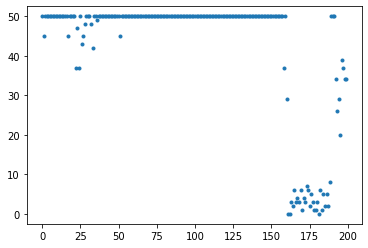

In [8]:
print(len(new_ytrain))
plt.plot(accs,'.')
plt.show()

In [9]:
np.random.seed(1000)
np.random.shuffle(new_xtrain)
np.random.seed(1000)
np.random.shuffle(new_ytrain)

In [10]:
t.save(t.tensor(new_xtrain),'new_xtrain.pt')
t.save(t.tensor(new_ytrain),'new_ytrain.pt')

In [29]:
rand = np.arange(60000)
np.random.shuffle(rand)
train_no = rand[:50000]

X = data

val_no = np.setdiff1d(rand,train_no)

X_train,X_val = X[train_no,:-1],X[val_no,:-1]
Y_train,Y_val = X[train_no,-1:],X[val_no,-1:]
Y_train.shape = (Y_train.shape[0],)  
Y_val.shape = (Y_val.shape[0],)
X_train.shape = (X_train.shape[0],X_train.shape[1])
X_val.shape = (X_val.shape[0],X_val.shape[1])

In [30]:
clf = LogisticRegression()
clf.fit(X_train, Y_train)
predictions = clf.predict(X_val)

In [31]:
predictions

array([1., 0., 0., ..., 1., 0., 0.])

In [32]:
Y_val==predictions

array([ True,  True,  True, ...,  True,  True,  True])

In [33]:
np.mean(Y_val==predictions)

0.9865

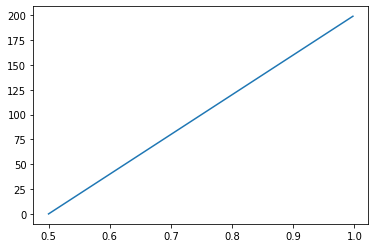

In [22]:
x = np.array([i/400 for i in range(200,400)])
plt.plot(x,(x-0.5)*400)
plt.show()

In [23]:
(x-0.5)*400

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [69]:
a = np.random.randint(0,9,(5,2,2))
b = np.random.uniform(0,1,(5,1))

In [70]:
for i in range(5):
    print(a[i], b[i])

[[3 6]
 [2 5]] [0.35071497]
[[8 5]
 [6 6]] [0.3567042]
[[7 6]
 [3 4]] [0.87796415]
[[8 1]
 [3 7]] [0.49604127]
[[2 0]
 [4 4]] [0.99237352]


In [71]:
np.random.seed(1000)
np.random.shuffle(a)
np.random.seed(1000)
np.random.shuffle(b)

In [72]:
for i in range(5):
    print(a[i], b[i])

[[7 6]
 [3 4]] [0.87796415]
[[8 5]
 [6 6]] [0.3567042]
[[3 6]
 [2 5]] [0.35071497]
[[2 0]
 [4 4]] [0.99237352]
[[8 1]
 [3 7]] [0.49604127]
